In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


# install requirements.txt

In [2]:
!pip install -r /content/drive/MyDrive/Computer_Vision_Final/requirements.txt
!pip install pyyaml
!pip freeze


ERROR: Invalid requirement: 'PyYAML=6.0.2': Expected end or semicolon (after name and no valid version specifier)
    PyYAML=6.0.2
          ^ (from line 11 of /content/drive/MyDrive/Computer_Vision_Final/requirements.txt)
Hint: = is not a valid operator. Did you mean == ?
absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.16.0.35.48
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.29.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.1
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.12.14


In [3]:
!python --version


Python 3.10.12


In [4]:
import yaml
print(yaml.__version__)


6.0.2


In [5]:
# Step 1: Install YOLOv5 dependencies

# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install required dependencies
# !pip install -U -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17075 (delta 19), reused 7 (delta 7), pack-reused 17049 (from 2)
Receiving objects: 100% (17075/17075), 15.69 MiB | 12.55 MiB/s, done.
Resolving deltas: 100% (11724/11724), done.
/content/yolov5


In [ ]:
# Step 2: Organize the Dataset

# Make sure your dataset structure follows this format:
# dataset/
#   ├── images/
#   │   ├── train/
#   │   │   ├── sitting_positive/
#   │   │   │   ├── 1.jpg
#   │   │   └── sitting_negative/
#   │   │       ├── 1.jpg
#   │   ├── val/
#   │   │   ├── sitting_positive/
#   │   │   │   ├── 1.jpg
#   │   │   └── sitting_negative/
#   │   │       ├── 1.jpg
#   ├── labels/
#   │   ├── train/
#   │   │   ├── sitting_positive/
#   │   │   │   ├── 1.txt
#   │   │   └── sitting_negative/
#   │   │       ├── 1.txt
#   │   ├── val/
#   │   │   ├── sitting_positive/
#   │   │   │   ├── 1.txt
#   │   │   └── sitting_negative/
#   │   │       ├── 1.txt


In [ ]:
# Step 3: Annotate the Images using LabelImg or Roboflow
# Labeling images using LabelImg tool. You can save annotations in YOLO format.
# Save the labels in .txt files which match the corresponding images in the "images" directory.


In [11]:
# Step 4: Prepare Dataset Configuration File
# Create a YAML file for dataset configuration. This file tells YOLOv5 where to find the dataset.

dataset_yaml = """
train: /content/drive/MyDrive/Computer_Vision_Final/dataset/images/train
val: /content/drive/MyDrive/Computer_Vision_Final/dataset/images/val

nc: 2  # Number of classes (good posture and bad posture)
names: ['sitting_positive', 'sitting_negative']  # Class names
"""

# Save the dataset.yaml file
with open('/content/dataset.yaml', 'w') as f:
    f.write(dataset_yaml)


In [12]:
# Step 5: Train the YOLOv5 Model

# Download a pre-trained model and fine-tune it on your dataset.
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 100 --data /content/dataset.yaml --weights yolov5s.pt --project /content/yolov5/output



wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-21 00:19:15.943898: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-21 00:19:15.966558: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-21 00:19:15.972592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [13]:
# Step 6: Evaluate the Model

# After training, you can evaluate your model using the following command:
!python /content/yolov5/val.py --weights /content/yolov5/output/exp/weights/best.pt --data /content/dataset.yaml --img 640


val: data=/content/dataset.yaml, weights=['/content/yolov5/output/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/Computer_Vision_Final/dataset/labels/val/sitting_negative.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:01<00:00,  1.00it/s]
                   all         40         41      0.791      0.912      0.898      0.697
      sitting_positive         40         21       0.76      0.9

In [1]:
# !pip install -U -r /content/yolov5/requirements.txt


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-21 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


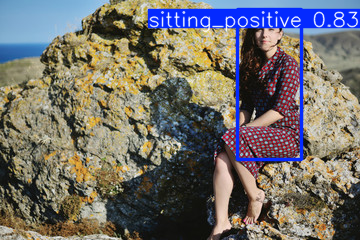

      xcenter    ycenter      width      height  confidence  class  \
0  269.402527  84.523422  64.118317  150.568481    0.831204      0   

               name  
0  sitting_positive  


In [44]:
# Step 7: Inference (Make Predictions)

# After training, use the model to make predictions on new images.
from pathlib import Path
import matplotlib.pyplot as plt
import torch
from PIL import Image

# Load the model (use the correct path to your weights file)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/output/exp/weights/best.pt')

# Load an image
img_path = '/content/drive/MyDrive/Computer_Vision_Final/dataset/images/val/sitting_positive/6.jpg'  # Path to a validation image
img = Image.open(img_path)

# Run inference
results = model(img)

# Display the results
results.show()

# To get the prediction details (bounding box, label, confidence)
predictions = results.pandas().xywh[0]
print(predictions)



In [8]:
# Step 8: Save and Export the Model

# After training, save the model in different formats (like TensorFlow or ONNX for deployment).
!python /content/yolov5/export.py --weights /content/yolov5/output/exp/weights/best.pt --img-size 640 --batch-size 1 --include pb



export: data=yolov5/data/coco128.yaml, weights=['/content/yolov5/output/exp/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['pb']
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/output/exp/weights/best.pt with output shape (1, 25200, 7) (13.7 MB)

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be t